In [1]:
#Slide 4:

lbw <- read.delim("Data/lbw.txt")
by(lbw$bwt, lbw$race, summary)

lbw$race: black
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1135    2370    2849    2720    3057    3860 
------------------------------------------------------------ 
lbw$race: other
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    709    2313    2835    2804    3274    4054 
------------------------------------------------------------ 
lbw$race: white
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1021    2585    3076    3103    3651    4990 

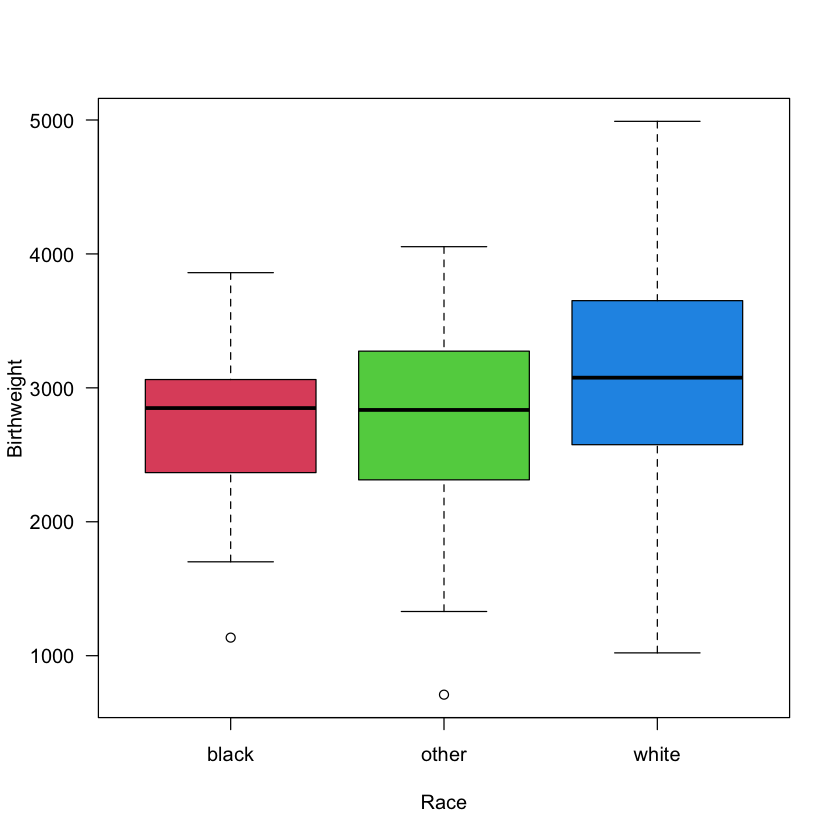

In [2]:
# Slide 5: 

boxplot(bwt ~ race, data = lbw, xlab = 'Race', ylab = 'Birthweight',
las = 1, col = 2:4)

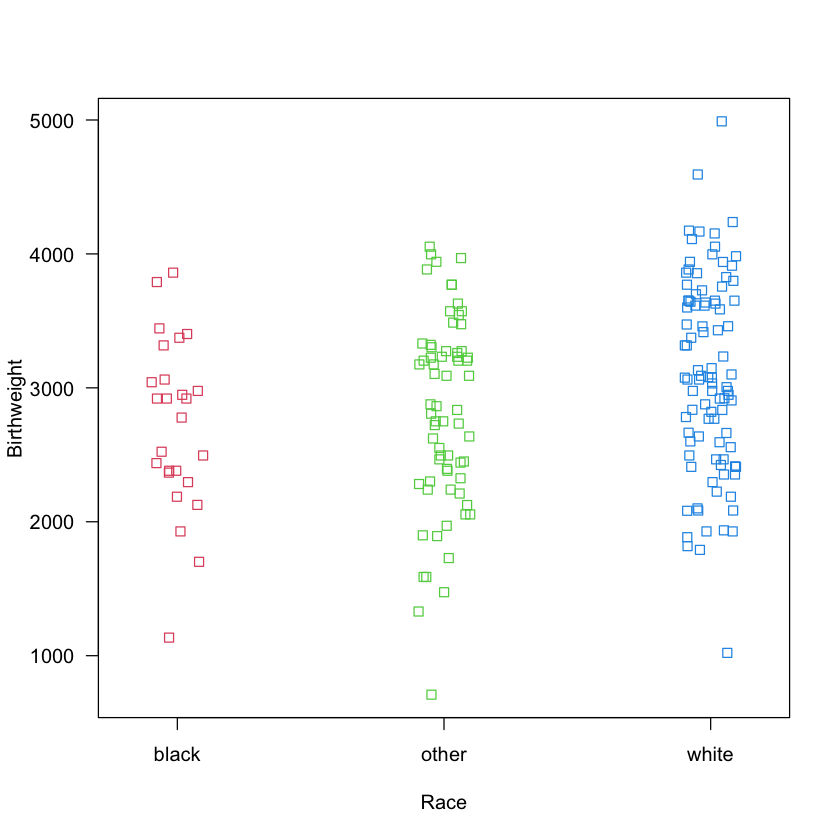

In [3]:
# Slide 8:

stripchart(bwt ~ race, data = lbw, vertical = TRUE, xlab = "Race",
ylab = "Birthweight", method = "jitter", las = 1, col = 2:4)

In [4]:
# Slide 10:

model1<-lm(bwt ~ race, data = lbw)
anova(model1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
race,2,5048361,2524180.5,4.949012,0.008052094
Residuals,186,94866938,510037.3,NA,NA


In [5]:
# Slide 11:

model2<-lm(bwt ~ 1, data = lbw)
anova(model2,model1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,188,99915299,NA,NA,NA,NA
2,186,94866938,2,5048361,4.949012,0.008052094


In [7]:
# Slide 13:

summary(model1)


Call:
lm(formula = bwt ~ race, data = lbw)

Residuals:
     Min       1Q   Median       3Q      Max 
-2095.01  -503.01   -13.01   526.99  1886.99 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2719.69     140.06  19.418   <2e-16 ***
raceother      84.32     165.01   0.511   0.6100    
racewhite     383.32     157.89   2.428   0.0161 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 714.2 on 186 degrees of freedom
Multiple R-squared:  0.05053,	Adjusted R-squared:  0.04032 
F-statistic: 4.949 on 2 and 186 DF,  p-value: 0.008052


In [8]:
# Slide 14:

tab <- cbind(coef(summary(model1))[ , 1:2], "Lower" = confint(model1)[ , 1],
             "Upper" = confint(model1)[ , 2])
data.frame(round(tab, 2),
           "p-value" = format.pval(coef(summary(model1))[ , 4], 
           digits = 3, eps = 1e-3))

,Estimate,Std..Error,Lower,Upper,p.value
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),2719.69,140.06,2443.38,2996.00,<0.001
raceother,84.32,165.01,-241.22,409.86,0.6100
racewhite,383.32,157.89,71.83,694.81,0.0161


In [9]:
# slide 15:

model1a<-lm(bwt ~ race-1, data = lbw)

tab <- cbind(coef(summary(model1a))[ , 1:2], "Lower" = confint(model1a)[ , 1],
             "Upper" = confint(model1a)[ , 2])
data.frame(round(tab, 2))

,Estimate,Std..Error,Lower,Upper
,<dbl>,<dbl>,<dbl>,<dbl>
raceblack,2719.69,140.06,2443.38,2996.00
raceother,2804.01,87.25,2631.89,2976.14
racewhite,3103.01,72.89,2959.21,3246.81


In [14]:
# Slide 17:

# install.packages("MESS")
library(MESS)
qqwrap <- function(x, y, ...) {qqnorm(y,main="",...)
abline(a=0, b=1)}

set.seed(2383)
wallyplot(model1, FUN=qqwrap)

ERROR: Error in library(MESS): there is no package called ‘MESS’


In [ ]:
# slide 18:

par(mfrow=c(2,2))
plot(model1,which=1:4)
par(mfrow=c(1,1))

In [ ]:
# slide 19:
par(mfrow=c(2,2))
qqnorm(model1$res[lbw$race=="black"],main="Normal QQ Plot, Black group")
abline(a=0, b=summary(model1)$sigma,col="red",lwd=2)
qqnorm(model1$res[lbw$race=="other"],main="Normal QQ Plot, Other group")
abline(a=0, b=summary(model1)$sigma,col="red",lwd=2)
qqnorm(model1$res[lbw$race=="white"],main="Normal QQ Plot, White group")
abline(a=0, b=summary(model1)$sigma,col="red",lwd=2)
par(mfrow=c(1,1))

In [ ]:
# Slide 22:
bartlett.test(bwt~race,data=lbw)

In [ ]:
# Slide 24:

pairwise.t.test(lbw$bwt, lbw$race, p.adj = "none")

In [ ]:
# slide 25:

pairwise.t.test(lbw$bwt, lbw$race, p.adj = "bonferroni")

In [ ]:
# Slide 26:

boxplot(bwt ~ race*smoke, data=lbw, xlab = 'Race and Smoke',
ylab = 'Birthweight', las = 1, col = 2:4)

In [ ]:
# Slide 27:
lbw$smoke <- as.factor(lbw$smoke)
model1 <- lm(bwt ~ race + smoke + race:smoke, data = lbw)

In [ ]:
# Slide 28:

par(mfrow=c(2,2))
plot(model1,which=1:4)

lbw2<-lbw; lbw2$group<-paste(lbw$race,",",lbw$smoke)
bartlett.test(bwt ~ group, data=lbw2)

par(mfrow=c(2,3))
for( i in levels(as.factor(lbw2$group))){
  qqnorm(model1$res[lbw2$group==i],main=i)
  abline(a=0,b=summary(model1)$sigma,lwd=2,col="red")
  }
par(mfrow=c(1,1))

In [ ]:
# Slide 31:
summary(model1)

In [ ]:
# Slide 33:

model1a <- lm(bwt ~ race:smoke-1, data = lbw)
summary(model1a)

In [ ]:
# Slide 37:

drop1(model1,test="F")

model2<-update(model1,~.-race:smoke)
drop1(model2,test="F")

In [ ]:
# Slide 38:


tab <- cbind(coef(summary(model2))[ , 1:2], "Lower" = confint(model1)[ , 1],
             "Upper" = confint(model2)[ , 2])
data.frame(round(tab, 2),
           "p-value" = format.pval(coef(summary(model2))[ , 4], 
           digits = 3, eps = 1e-3))

In [ ]:
# Slide 40:
CADdata <- read.csv("Data/cadmium.txt", sep="")
CADdata$group <- as.factor(CADdata$group)

plot(CADdata$age, CADdata$vitcap,
col = c("blue","red","green")[CADdata$group],
xlab = "Age", ylab = "Vital Capacity (L)",
las = 1, cex = 1.5, pch = c(16,16,16))
legend(55,5.8, c(">10 years","<10 years", "Not exposed"),
col = c("blue","red","green"),
pch = c(16,16,16), title = "Exposure")

In [ ]:
# Slide 41:
par(mfrow = c(1,2), mgp = c(2,0.7,0), mar = c(3,3,1,1))
boxplot(vitcap ~ group, data = CADdata, ylab = 'Vital Capacity (L)',
las = 1, xaxt = "n", col = 5)
axis(1, at = c(1,2,3),
labels = c(">10 years","<10 years", "Not exposed"))
boxplot(age ~ group, data = CADdata ,ylab = 'Age',
las = 1, xaxt = "n", col = 5)
axis(1, at = c(1,2,3),
labels = c(">10 years", "<10 years", "Not exposed"))
par(mfrow = c(1,1))

In [ ]:
# Slide 45:
CADdata$expo[CADdata$group==3] <- 1
CADdata$expo[CADdata$group==2] <- 2
CADdata$expo[CADdata$group==1] <- 3

CADdata$expo<-as.factor(CADdata$expo)

model1<-lm(vitcap ~ expo + age, data = CADdata)

In [ ]:
# Slide 46:
par(mfrow = c(2,2), mgp = c(2,0.7,0), mar = c(3,3,1.5,1))
plot(model1, which = 1:4)
par(mfrow = c(1,1))

In [ ]:
# Slide 47:

set.seed(3447)
wallyplot(model1)

In [ ]:
# Slide 48:
plot(CADdata$age, model1$residuals, xlab = 'Age',
ylab = 'Residuals')

In [ ]:
# Slide 50:
summary(model1)
drop1(model1,test="F")

In [ ]:
# Slide 51:

my.coef <- coef(model1)

par(mfrow=c(1,1))
plot(CADdata$age, CADdata$vitcap, col=c("green","red","blue")[CADdata$expo],
     xlab = "Age", 
     ylab = "Vital Capacity (L)",xlim=c(15,68), ylim=c(2.5,6), 
     pch=c(16,16,16), main = "Exposure to cadmium")

legend(57.2,6.2, c("Not exposed","Low","High" ),
       col=c("green","red","blue"), pch = c(16,16,16),bty="n")

# plot line for first group, expo=1
lines(18:65, my.coef[1] + my.coef[4]*(18:65), col="green", type="l",lwd=2)
# plot line for second group, expo=2
lines(21:58, my.coef[1] + my.coef[2]+ my.coef[4]*(21:58), col="red", type="l", lwd=2)
# plot line for third group, expo=3
lines(39:65, my.coef[1] + my.coef[3] + my.coef[4]*(39:65), col="blue", type="l", lwd=2)

In [ ]:
# Slide 53:
model2 <- lm(vitcap ~ age + expo + age:expo, data = CADdata)
summary(model2)

drop1(model2, test = "F")

In [ ]:
# Slide 54:
model2B<-lm(vitcap ~ 0 + expo + age:expo, data = CADdata)
my.coef <- coef(model2B)
my.coef

plot(CADdata$age, CADdata$vitcap, col=c("green","red","blue")[CADdata$expo],
     xlab = "Age", 
     ylab = "Vital Capacity (L)",xlim=c(15,68), ylim=c(2.5,6), pch=c(16,16,16), main = "Exposure to cadmium")

legend(57.2,6.2, c("Not exposed","Low","High" ),
       col=c("green","red","blue"), pch = c(16,16,16), bty="n" )


# plot line for first group, expo=1
lines(18:65, my.coef[1] + my.coef[4]*(18:65), col="green", type="l",lwd=2)
# plot line for second group, expo=2
lines(21:58, my.coef[2] + my.coef[5]*(21:58), col="red", type="l", lwd=2)
# plot line for first group, expo=3
lines(39:65, my.coef[3] + my.coef[6]*(39:65), col="blue", type="l", lwd=2)

In [ ]:
# Slide 65:

heatclimate<-read.table("Data/heatclimate.txt",header=T, sep=" ")
heatclimate$sex<-as.factor(heatclimate$sex)
summary(heatclimate)

In [ ]:
# Slide 66:
X<-as.matrix(heatclimate[heatclimate$sex=="f",3:4])
Y<-as.matrix(heatclimate[heatclimate$sex=="m",3:4])
n<-dim(X)[1]
m<-dim(Y)[1]
p<-dim(X)[2]
Xbar<-colMeans(X)
Ybar<-colMeans(Y)

Xbar2<-matrix(rep(Xbar,16),ncol=p,byrow=T)
Ybar2<-matrix(rep(Ybar,16),ncol=p,byrow=T)

S1<-t(X-Xbar2)%*%(X-Xbar2)/(n-1)
S2<-t(Y-Ybar2)%*%(Y-Ybar2)/(m-1)

S<-((n-1)*S1+(m-1)*S2)/(n+m-2)
S

In [ ]:
#Slide 67:
T2<-(n*m/(n+m))*t(Xbar-Ybar)%*%solve(S)%*%(Xbar-Ybar)
T2
1-pf(T2,p,n+n-p+1)